In [48]:
# %pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [5]:
driver.close()

In [1]:
url = "http://www.riss.kr/search/Search.do?isDetailSearch=Y&searchGubun=true&viewYn=OP&queryText=znPublisher%2C%EC%97%B0%EC%84%B8%EB%8C%80%ED%95%99%EA%B5%90+%EB%8C%80%ED%95%99%EC%9B%90&strQuery=&exQuery=l_sub_code%3A20%E2%97%88&exQueryText=%EC%A3%BC%EC%A0%9C%EB%B6%84%EB%A5%98+%5B%EC%82%AC%ED%9A%8C%EA%B3%BC%ED%95%99%5D%40%40l_sub_code%3A20%E2%97%88&order=%2FDESC&onHanja=false&strSort=RANK&p_year1=&p_year2=&iStartCount=0&orderBy=&mat_type=&mat_subtype=&fulltext_kind=&t_gubun=&learning_type=&ccl_code=&inside_outside=&fric_yn=&image_yn=&gubun=&kdc=&ttsUseYn=&l_sub_code=&fsearchMethod=search&sflag=1&isFDetailSearch=N&pageNumber=1&resultKeyword=&fsearchSort=&fsearchOrder=&limiterList=&limiterListText=&facetList=&facetListText=&fsearchDB=&icate=bib_t&colName=bib_t&pageScale=10&isTab=Y&regnm=&dorg_storage=&language=&language_code=&clickKeyword=&relationKeyword=&query="

keyword = {
    "etc":[],
    "1970":[],
    "1980":[],
    "1990":[],
    "2000":[],
    "2010":[],
    "2020":[]
}

In [2]:
from selenium import webdriver
driver = webdriver.Chrome(executable_path=r"C:\sele\chromedriver.exe")

driver.get(url)

C:\Users\Autumn\AppData\Local\Temp\ipykernel_8316\94304089.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"C:\sele\chromedriver.exe")


In [3]:
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import time

In [4]:

#divContent > div > div.rightContent.wd756 > div > div.srchResultW > div.srchResultListW > ul > li:nth-child(2) > div.cont.ml60 > p.title
count = 3
a = 0
while(count != 0):
    

    for j in range(1,11):
        try:
            # 논문 페이지 접근 
            element = driver.find_element(By.XPATH, f'//*[@id="divContent"]/div/div[2]/div/div[2]/div[2]/ul/li[{j}]/div[2]/p[1]/a')
            element.click()

            # 페이지 접근해서 source code 가져오기 
            html = driver.page_source
            finder = BeautifulSoup(html, 'lxml')
            
            # 주제어 태그 가져오기 
            checker = finder.find('div', attrs={"id":"thesisInfoDiv"}).find('div', attrs={'class':'infoDetail on'}).find('div', attrs={'infoDetailL'}).ul.find_all('li')[5].find_all('a', attrs={'class':'instituteInfo'})

            year = finder.select_one("#thesisInfoDiv > div.infoDetail.on > div.infoDetailL > ul > li:nth-child(4) > div > p")
            year = int(year.get_text())
            
            if year >= 2020:
                for i in range(len(checker)):
                    keyword["2020"].append(checker[i].text)
            elif year >= 2010:
                for i in range(len(checker)):
                    keyword["2010"].append(checker[i].text)
            elif year >= 2000:
                for i in range(len(checker)):
                    keyword["2000"].append(checker[i].text)
            elif year >= 1990:
                for i in range(len(checker)):
                    keyword["1990"].append(checker[i].text)
            elif year >= 1980:
                for i in range(len(checker)):
                    keyword["1980"].append(checker[i].text)
            elif year >= 1970:
                for i in range(len(checker)):
                    keyword["1970"].append(checker[i].text)
            else:
                for i in range(len(checker)):
                    keyword["etc"].append(checker[i].text)
            # # 주제어 append 
            # for i in range(len(checker)):
            #     keyword.append(checker[i].text)
            
            time.sleep(1)
            driver.back()

            print(f"j: {j}")
        except: 
            break

    print()
    try:
        element = driver.find_element(By.XPATH, f'//*[@id="divContent"]/div/div[2]/div/div[3]/a[{count}]')
        element.click()
    except: 
        break
    if a == 0:
        if count == 12:
            count = 3
            a = 1

    if count == 13:
        count = 4
        ###### 30 개만 돌리기용
        # if a != 1:
        #     a = a + 1
        # else:
        #     break
        ######
    else:
        count = count + 1
    print(f"count: {count}")
    time.sleep(1)


j: 1
j: 2
j: 3
j: 4



In [ ]:
//*[@id="divContent"]/div/div[2]/div/div[3]/a[3]
//*[@id="divContent"]/div/div[2]/div/div[3]/a[13]
//*[@id="divContent"]/div/div[2]/div/div[3]/a[4]

SyntaxError: invalid syntax (1938960040.py, line 1)

In [ ]:
import pickle
# with open("list_ex.pkl","wb") as f:
#     pickle.dump(keyword, f)
# with open("list_ex.pkl","rb") as f:
#     list_ex_load = pickle.load(f)

with open('save2.pkl', 'wb') as f:
    pickle.dump(keyword, f)

with open('save2.pkl', 'rb') as f:
    loaded = pickle.load(f)
# '//*[@id="divContent"]/div/div[2]/div/div[3]/a[3]'
# '//*[@id="divContent"]/div/div[2]/div/div[3]/a[4]'
# '//*[@id="divContent"]/div/div[2]/div/div[3]/a[2]'
# '//*[@id="divContent"]/div/div[2]/div/div[3]/a[12]'

# '//*[@id="divContent"]/div/div[2]/div/div[3]/a[3]'

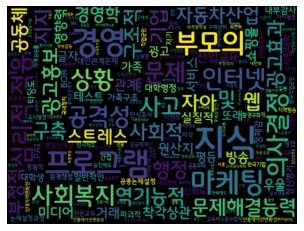

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/MalangmalangB.ttf' # For Korean characters

noun_text = ' '.join(keyword["1990"])
    
wordcloud = WordCloud(max_font_size=100, width=800, height=600, font_path=FONT_PATH)
wordcloud.generate(noun_text) 
# generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('1990.png')

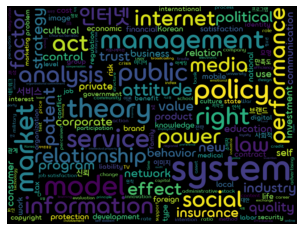

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/MalangmalangB.ttf' # For Korean characters

noun_text = ' '.join(keyword["2000"])
    
wordcloud = WordCloud(max_font_size=100, width=800, height=600, font_path=FONT_PATH)
wordcloud.generate(noun_text) 
# generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('2000.png')

In [ ]:
keyword["2000"]

['universities',
 'institutional environment',
 'normative isomorphism',
 'mimetic isomorphism',
 'imitation',
 'professional school',
 'status',
 '대학교',
 '제도적 환경',
 '모방적 동형화',
 '전문',
 '특수 대학원',
 '규범',
 '지위',
 '지식관리시스템',
 '연세대학교 중앙도서관 강의/연구지원 정보시스템',
 '강의정보지원서비스',
 '대학도서관',
 '지식 특성',
 '지식경영 전략',
 '가상교육 시스템',
 '제도적 평가보상',
 '경영층의 지원',
 '디지털도서관',
 '지식공유',
 '시스템 특성',
 'knowledge management system',
 'KMS',
 'Yonsei University Library’s lecture/research-supporting information system',
 'university library',
 'digital library',
 'knowledge sharing',
 'system properties',
 'knowledge properties',
 'strategies of knowledge management',
 'virtual education system',
 'systematic compensation for evaluation',
 'top management support',
 '경찰대학',
 '경찰교육기관',
 '전문화',
 '개방화',
 '경찰대학원',
 '사회적소수자',
 '다양성수용',
 '다양성교육',
 'openness to diversity',
 'social minority',
 'social work education',
 'diversity education',
 '외래환자',
 '병원선택 요인',
 'outpatient',
 'hospital selecting factor',
 'medical quality',
 'ERP'

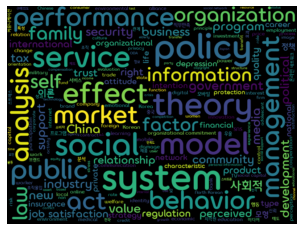

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/MalangmalangB.ttf' # For Korean characters

noun_text = ' '.join(keyword["2010"])
    
wordcloud = WordCloud(max_font_size=100, width=800, height=600, font_path=FONT_PATH)
wordcloud.generate(noun_text) 
# generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('2010.png')

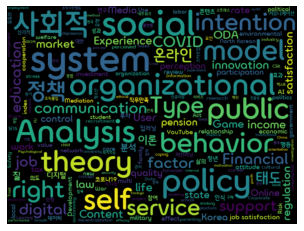

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = 'C:/Windows/Fonts/MalangmalangB.ttf' # For Korean characters

noun_text = ' '.join(keyword["2020"])
    
wordcloud = WordCloud(max_font_size=100, width=800, height=600, font_path=FONT_PATH)
wordcloud.generate(noun_text) 
# generate() 는 하나의 string value를 입력 받음
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file('2020.png')